 # IERG 5350 Assignment 1: Tabular Reinforcement Learning

 *2020-2021 Term 1, IERG 5350: Reinforcement Learning. Department of Information Engineering, The Chinese University of Hong Kong. Course Instructor: Professor ZHOU Bolei. Assignment author: PENG Zhenghao, SUN Hao, ZHAN Xiaohang.*


 | Student Name | Student ID |
 | :----: | :----: |
 | LIU Yicheng | 1155152886 |

 ------

 Welcome to the assignment 1 of our RL course. The objective of this assignment is for you to understand the classic methods used in tabular reinforcement learning.

 This assignment has the following sections:

  - Section 1: Warm-up on the RL environment (35 points)
  - Section 2: Implementation of model-based family of algorithms: policy iteration and value iteration. (65 points)

 You need to go through this self-contained notebook, which contains **21 TODOs** in part of the cells and has special `[TODO]` signs. You need to finish all TODOs. Some of them may be easy such as uncommenting a line, some of them may be difficult such as implementing a function. You can find them by searching the `[TODO]` symbol. However, we suggest you to go through the documents step by step, which will give you a better sense of the content.

 You are encouraged to add more code on extra cells at the end of the each section to investigate the problems you think interesting. At the end of the file, we left a place for you to optionaly write comments (Yes, please give us some either negative or positive rewards so we can keep improving the assignment!).

 Please report any code bugs to us via **github issues**.

 Before you get start, remember to follow the instruction at https://github.com/cuhkrlcourse/ierg5350-assignment to setup your environment.

 Now start running the cells sequentially (by `ctrl + enter` or `shift + enter`) to avoid unnecessary errors by skipping some cells.


 ## Section 1: Warm-up on the RL environment

 (35/100 points)

 In this section, we will go through the basic concepts of RL environments using OpenAI Gym. Besides, you will get the first sense of the toy environment we will use in the rest of the assignment.

 Every Gym environment should contain the following attributes:

 1. `env.step(action)` To step the environment by applying `action`. Will return four things: `observation, reward, done, info`, wherein `done` is a boolean value indicating whether this **episode** is finished. `info` may contain some information the user is interested in, we do not use it.
 2. `env.reset()` To reset the environment, back to the initial state. Will return the initial observation.
 3. `env.render()` To render the current state of the environment for human-being
 4. `env.action_space` The allowed action format. In our case, it is `Discrete(4)` which means the action is an integer in the range [0, 1, 2, 3]. Therefore the `action` for `step(action)` should obey the limit of the action space.
 5. `env.observation_space` The observation space.
 6. `env.seed(seed)` To set the random seed of the environment. So the result is replicable.

 Note that the word **episode** means the process that an agent interacts with the environment from the initial state to the terminal state. Within one episode, the agent will only receive one `done=True`, when it goes to the terminal state (the agent is dead or the game is over).

 We will use "FrozenLake8x8-v0" as our environment. In this environment, the agent controls the movement of a character in a grid world. Some tiles of the grid are walkable, and others lead to the agent falling into the water. Additionally, the movement direction of the agent is uncertain and only partially depends on the chosen direction. The agent is rewarded for finding a walkable path to a goal tile. The meaning of each character:

 1. S : starting point, safe
 2. F : frozen surface, safe
 3. H : hole, fall to your doom
 4. G : goal, where the frisbee is located


In [1]:
# Run this cell without modification

# Import some packages that we need to use
from utils import *
import gym
import numpy as np
from collections import deque


 ### Section 1.1: Make the environment

 You need to know

 1. How to make an environment
 2. How to set the random seed of environment
 3. What is observation space and action space

In [2]:
# Solve the TODOs and remove `pass`

# [TODO] Just a reminder. Do you add your name and student 
# ID in the table at top of the notebook?
# yes!

# Create the environment
env = gym.make('FrozenLake8x8-v0')

# You need to reset the environment immediately after instantiating env. 
env.reset()  # [TODO] uncomment this line

# Seed the environment
env.seed(0)  # [TODO] uncomment this line

print("Current observation space: {}".format(env.observation_space))
print("Current action space: {}".format(env.action_space))
print("0 in action space? {}".format(env.action_space.contains(0)))
print("5 in action space? {}".format(env.action_space.contains(5)))


Current observation space: Discrete(64)
Current action space: Discrete(4)
0 in action space? True
5 in action space? False


 ### Section 1.2: Play the environment with random actions

 You need to know

 1. How to step the environment
 2. How to render the environment

In [3]:
# Solve the TODOs and remove `pass`

# Run 1000 steps for test, terminate if done.
# You can run this cell multiples times.
env.reset()

while True:
    # take random action
    # [TODO] Uncomment next line
    obs, reward, done, info = env.step(env.action_space.sample())

    # render the environment
    env.render()  # [TODO] Uncomment this line

    print("Current observation: {}\nCurrent reward: {}\n"
          "Whether we are done: {}\ninfo: {}".format(
        obs, reward, done, info
    ))
    wait(sleep=0.5)

    # [TODO] terminate the loop if done
    if done:
       break


(Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
Current observation: 19
Current reward: 0.0
Whether we are done: True
info: {'prob': 0.3333333333333333}


 ### Section 1.3: Define the evaluation function to value the random baseline

 Now we need to define an evaluation function to evaluate a given policy (a function where the input is observation and the output is action). This is convenient for future evaluation.

 As a reminder, you should create a `FrozenLake8x8-v0` environment instance by default, reset it after each episode (and at the beginning), step the environment, and terminate episode if done.

 After implementing the `evaluate` function, run the next cell to check whether you are right.

In [4]:
# Solve the TODOs and remove `pass`

def _render_helper(env):
    env.render()
    wait(sleep=0.2)


def evaluate(policy, num_episodes, seed=0, env_name='FrozenLake8x8-v0', render=False):
    """[TODO] You need to implement this function by yourself. It
    evaluate the given policy and return the mean episode reward.
    We use `seed` argument for testing purpose.
    You should pass the tests in the next cell.

    :param policy: a function whose input is an interger (observation)
    :param num_episodes: number of episodes you wish to run
    :param seed: an interger, used for testing.
    :param env_name: the name of the environment
    :param render: a boolean flag. If true, please call _render_helper
    function.
    :return: the averaged episode reward of the given policy.
    """

    # Create environment (according to env_name, we will use env other than 'FrozenLake8x8-v0')
    env = gym.make(env_name)

    # Seed the environment
    env.seed(seed)

    # Build inner loop to run.
    # For each episode, do not set the limit.
    # Only terminate episode (reset environment) when done = True.
    # The episode reward is the sum of all rewards happen within one episode.
    # Call the helper function `render(env)` to render
    rewards = []
    for i in range(num_episodes):
        # reset the environment
        obs = env.reset()
        act = policy(obs)
        
        ep_reward = 0
        while True:
            # [TODO] run the environment and terminate it if done, collect the
            # reward at each step and sum them to the episode reward.
            obs, reward, done, info = env.step(act)
            act = policy(obs)
            ep_reward += reward
            if render:
                _render_helper(env)
            if done:
                break
        rewards.append(ep_reward)

    return np.mean(rewards)

# # [TODO] Run next cell to test your implementation!



In [5]:
# Run this cell without modification

# Run this cell to test the correctness of your implementation of `evaluate`.
LEFT = 0
DOWN = 1
RIGHT = 2
UP = 3

def expert(obs):
    """Go down if agent at the right edge, otherwise go right."""
    return DOWN if (obs + 1) % 8 == 0 else RIGHT

def assert_equal(seed, value, env_name):
    ret = evaluate(expert, 1000, seed, env_name=env_name)
    assert ret == value,     "When evaluate on seed {}, 1000 episodes, in {} environment, the "     "averaged reward should be {}. But you get {}."     "".format(seed, env_name, value, ret)
      
assert_equal(0, 0.065, 'FrozenLake8x8-v0')
assert_equal(1, 0.059, 'FrozenLake8x8-v0')
assert_equal(2, 0.055, 'FrozenLake8x8-v0')

assert_equal(0, 0.026, 'FrozenLake-v0')
assert_equal(1, 0.034, 'FrozenLake-v0')
assert_equal(2, 0.028, 'FrozenLake-v0')

print("Test Passed!")
print("\nAs a baseline, the mean episode reward of a hand-craft "
      "agent is: ", evaluate(expert, 1000))


Test Passed!

As a baseline, the mean episode reward of a hand-craft agent is:  0.065


 Congraduation! You have finished section 1 (if and only if not error happen at the above codes).

 If you want to do more investigation, feel free to open new cells via `Esc + B` after the next cells and write codes in it, so that you can reuse some result in this notebook. Remember to write sufficient comments and documents to let others know what you are doing.

In [6]:
# You can do more inverstigation here if you wish. Leave it blank if you don't.


 ------

 ## Section 2: Model-based Tabular RL

 (65/100 points)

 We have learned how to use the Gym environment to run an episode, as well as how to interact between the agent (policy) and environment via `env.step(action)` to collect observation, reward, done, and possible extra information.

 Now we need to build the basic tabular RL algorithm to solve this environment. **Note that compared to the model-free methods in the Sec.3, the algorithms in this section needs to access the internal information of the environment, namely the transition dynamics**. In our case, given a state and an action, we need to know which state current environment would jump to, and the probability of this happens, and the reward if the transition happens. You will see that we provide you a helper function `trainer._get_transitions(state, action)` that takes state and action as input and return you a list of possible transitions.

 You will use a class to represent a Trainer, which seems to be over-complex for tabular RL. But we will use the same framework in the future assignments, or even in your future research. So it would be helpful for you to get familiar with how to implement an RL algorithm in a class-orientetd programming style, as a first step toward the implementation of state of the art RL algorithm in the future.

In [7]:
# Run this cell without modification

class TabularRLTrainerAbstract:
    """This is the abstract class for tabular RL trainer. We will inherent the specify 
    algorithm's trainer from this abstract class, so that we can reuse the codes like
    getting the dynamic of the environment (self._get_transitions()) or rendering the
    learned policy (self.render())."""
    
    def __init__(self, env_name='FrozenLake8x8-v0', model_based=True):
        self.env_name = env_name
        self.env = gym.make(self.env_name)
        self.action_dim = self.env.action_space.n
        self.obs_dim = self.env.observation_space.n
        
        self.model_based = model_based

    def _get_transitions(self, state, act):
        """Query the environment to get the transition probability,
        reward, the next state, and done given a pair of state and action.
        We implement this function for you. But you need to know the 
        return format of this function.
        """
        self._check_env_name()
        assert self.model_based, "You should not use _get_transitions in "             "model-free algorithm!"
        
        # call the internal attribute of the environments.
        # `transitions` is a list contain all possible next states and the 
        # probability, reward, and termination indicater corresponding to it
        transitions = self.env.env.P[state][act]

        # Given a certain state and action pair, it is possible
        # to find there exist multiple transitions, since the 
        # environment is not deterministic.
        # You need to know the return format of this function: a list of dicts
        ret = []
        for prob, next_state, reward, done in transitions:
            ret.append({
                "prob": prob,
                "next_state": next_state,
                "reward": reward,
                "done": done
            })
        return ret
    
    def _check_env_name(self):
        assert self.env_name.startswith('FrozenLake')

    def print_table(self):
        """print beautiful table, only work for FrozenLake8X8-v0 env. We 
        write this function for you."""
        self._check_env_name()
        print_table(self.table)

    def train(self):
        """Conduct one iteration of learning."""
        raise NotImplementedError("You need to override the "
                                  "Trainer.train() function.")

    def evaluate(self):
        """Use the function you write to evaluate current policy.
        Return the mean episode reward of 1000 episodes when seed=0."""
        result = evaluate(self.policy, 1000, env_name=self.env_name)
        return result

    def render(self):
        """Reuse your evaluate function, render current policy 
        for one episode when seed=0"""
        evaluate(self.policy, 1, render=True, env_name=self.env_name)


 ### Section 2.1: Policy Iteration

 Recall the idea of policy iteration:

 1. Update the state value function, given all possible transitions in the environment.
 2. Find the best policy that makes the most out of the current state value function.
 3. If the best policy is identical to the previous one then stop the training. Otherwise, go to step 1.

 In step 1, the way to update the state value function is by

 $$v_{k+1} = E_{s'}[r(s, a)+\gamma v_{k}(s')]$$

 wherein the $a$ is given by current policy, $s'$ is next state, $r$ is the reward, $v_{k}(s')$ is the next state value given by the old (not updated yet) value function. The expectation is computed among all possible transitions (given a state and action pair, it is possible to have many different next states, since the environment is not deterministic).

 In step 2, the best policy is to take the action with maximum expected return given a state:

 $$a = {argmax}_a E_{s'}[r(s, a) + \gamma v_{k}(s')]$$

 Policy iteration algorithm has an outer loop (update policy, step 1 to 3) and an inner loop (fit the value function, within step 1). In each outer loop, we call once `trainer.train()`, where we call `trainer.update_value_function()` once to update the value function (the state value table). After that we call `trainer.update_policy()` to update the current policy. `trainer` object has a `trainer.policy` attribute, which is a function that takes observation as input and returns an action.

 You should implement the trainer following the framework we already wrote for you. Please carefully go through the codes and finish all `TODO` in it.

In [8]:
# Solve the TODOs and remove `pass`

class PolicyItertaionTrainer(TabularRLTrainerAbstract):
    def __init__(self, gamma=1.0, eps=1e-10, env_name='FrozenLake8x8-v0'):
        super(PolicyItertaionTrainer, self).__init__(env_name)

        # discount factor
        self.gamma = gamma

        # value function convergence criterion
        self.eps = eps

        # build the value table for each possible observation
        self.table = np.zeros((self.obs_dim,))

        # [TODO] you need to implement a random policy at the beginning.
        # It is a function that take an integer (state or say observation)
        # as input and return an interger (action).
        # remember, you can use self.action_dim to get the dimension (range)
        # of the action, which is an integer in range
        # [0, ..., self.action_dim - 1]
        # hint: generating random action at each call of policy may lead to
        #  failure of convergence, try generate random actions at initializtion
        #  and fix it during the training.
         
        self.random_tabular = np.random.randint(self.action_dim, size=self.obs_dim)
        self.policy = lambda x: self.random_tabular[x]
        # test your random policy
        test_random_policy(self.policy, self.env)

    def train(self):
        """Conduct one iteration of learning."""
        # [TODO] value function may be need to be reset to zeros.
        # if you think it should, than do it. If not, then move on.
        # hint: the value function is equivalent to self.table,
        #  a numpy array with length 64.
        self.update_value_function()
        self.update_policy()



    def update_value_function(self):
        count = 0  # count the steps of value updates
        while True:
            old_table = self.table.copy()

            for state in range(self.obs_dim):
                act = self.policy(state)
                transition_list = self._get_transitions(state, act)
                
                state_value = 0
                for transition in transition_list:
                    prob = transition['prob']
                    reward = transition['reward']
                    next_state = transition['next_state']
                    done = transition['done']
                    # [TODO] what is the right state value?
                    # hint: you should use reward, self.gamma, old_table, prob,
                    # and next_state to compute the state value
                    state_value += prob*(reward+self.gamma*old_table[next_state])
                
                # update the state value
                self.table[state] = state_value
                

            # [TODO] Compare the old_table and current table to
            #  decide whether to break the value update process.
            # hint: you should use self.eps, old_table and self.table
            should_break =  np.sum(np.abs(self.table-old_table)) < self.eps
            if should_break:
                
                break
            count += 1
            if count % 200 == 0:
                # disable this part if you think debug message annoying.
                print("[DEBUG]\tUpdated values for {} steps. "
                      "Difference between new and old table is: {}".format(
                    count, np.sum(np.abs(old_table - self.table))
                ))
            if count > 4000:
                print("[HINT] Are you sure your codes is OK? It shouldn't be "
                      "so hard to update the value function. You already "
                      "use {} steps to update value function within "
                      "single iteration.".format(count))
            if count > 6000:
                raise ValueError("Clearly your code has problem. Check it!")

    def update_policy(self):
        """You need to define a new policy function, given current
        value function. The best action for a given state is the one that
        has greatest expected return.

        To optimize computing efficiency, we introduce a policy table,
        which take state as index and return the action given a state.
        """
        policy_table = np.zeros([self.obs_dim, ], dtype=np.int)

        for state in range(self.obs_dim):
            state_action_values = [0] * self.action_dim

            # [TODO] assign the action with greatest "value"
            # to policy_table[state]
            # hint: what is the proper "value" here?
            #  you should use table, gamma, reward, prob,
            #  next_state and self._get_transitions() function
            #  as what we done at self.update_value_function()
            #  Bellman equation may help.
            best_action = 0
            best_state_action_value = 0
            for act in range(self.action_dim):
                transition_list = self._get_transitions(state, act)
                state_action_value =0
                for transition in transition_list:
                    prob = transition['prob']
                    reward = transition['reward']
                    next_state = transition['next_state']
                    done = transition['done']
                    state_action_value += prob*reward+self.gamma*prob*self.table[next_state]

                if best_state_action_value < state_action_value:
                    best_action = act
                    best_state_action_value = state_action_value
    
            policy_table[state] = best_action

        self.policy = lambda obs: policy_table[obs]


 Now we have built the Trainer class for policy iteration algorithm. In the following few cells, we will train the agent to solve the problem and evaluate its performance.

In [9]:
# Solve the TODOs and remove `pass`

# Managing configurations of your experiments is important for your research.
default_pi_config = dict(
    max_iteration=1000,
    evaluate_interval=1,
    gamma=1.0,
    eps=1e-10
)


def policy_iteration(train_config=None):
    config = default_pi_config.copy()
    if train_config is not None:
        config.update(train_config)
        
    trainer = PolicyItertaionTrainer(gamma=config['gamma'], eps=config['eps'])
    old_policy_result = {
        obs: -1 for obs in range(trainer.obs_dim)
    }
    old_policy_result_func = lambda x: old_policy_result[x]
    for i in range(config['max_iteration']):
        # train the agent
        trainer.train()  # [TODO] please uncomment this line

        # [TODO] compare the new policy with old policy to check whether
        #  should we stop. If new and old policy have same output given any
        #  observation, them we consider the algorithm is converged and
        #  should be stopped.
        should_stop = (sum([old_policy_result_func(obs) == trainer.policy(obs) for obs in range(trainer.obs_dim)]) == trainer.obs_dim)
        old_policy_result_func = trainer.policy

        if should_stop:
            print("We found policy is not changed anymore at "
                  "itertaion {}. Current mean episode reward "
                  "is {}. Stop training.".format(i, trainer.evaluate()))
            break
        

        # evaluate the result
        if i % config['evaluate_interval'] == 0:
            print(
                "[INFO]\tIn {} iteration, current mean episode reward is {}."
                "".format(i, trainer.evaluate()))

            if i > 20:
                print("You sure your codes is OK? It shouldn't take so many "
                      "({}) iterations to train a policy iteration "
                      "agent.".format(i))

    # assert trainer.evaluate() > 0.8,         "We expect to get the mean episode reward greater than 0.8. "         "But you get: {}. Please check your codes.".format(trainer.evaluate())

    return trainer


# # %%
# # Run this cell without modification

# # It may be confusing to call a trainer agent. But that's what we normally do.
pi_agent = policy_iteration()



[DEBUG]	Updated values for 200 steps. Difference between new and old table is: 5.930882294223811e-06
[DEBUG]	Updated values for 400 steps. Difference between new and old table is: 5.1997225039568384e-08
[DEBUG]	Updated values for 600 steps. Difference between new and old table is: 4.558920602137917e-10
[INFO]	In 0 iteration, current mean episode reward is 0.335.
[DEBUG]	Updated values for 200 steps. Difference between new and old table is: 0.043781313775536054
[DEBUG]	Updated values for 400 steps. Difference between new and old table is: 0.005420149688518547
[DEBUG]	Updated values for 600 steps. Difference between new and old table is: 0.0006487443111750715
[DEBUG]	Updated values for 800 steps. Difference between new and old table is: 7.653453224701345e-05
[DEBUG]	Updated values for 1000 steps. Difference between new and old table is: 8.971355053545571e-06
[DEBUG]	Updated values for 1200 steps. Difference between new and old table is: 1.0485908991247905e-06
[DEBUG]	Updated values for 1

In [10]:
# Run this cell without modification

print("Your policy iteration agent achieve {} mean episode reward. The optimal score "
      "should be almost {}.".format(pi_agent.evaluate(), 0.86))



Your policy iteration agent achieve 0.867 mean episode reward. The optimal score should be almost 0.86.


In [11]:
# Run this cell without modification

pi_agent.render()



(Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG


In [12]:
# Run this cell without modification

pi_agent.print_table()


+-----+-----+-----State Value Mapping-----+-----+-----+
|     |   0 |   1 |   2 |   3 |   4 |   5 |   6 |   7 |
|-----+-----+-----+-----+-----+-----+-----+-----+-----|
| 0   |1.000|1.000|1.000|1.000|1.000|1.000|1.000|1.000|
|     |     |     |     |     |     |     |     |     |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+
| 1   |1.000|1.000|1.000|1.000|1.000|1.000|1.000|1.000|
|     |     |     |     |     |     |     |     |     |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+
| 2   |1.000|0.978|0.926|0.000|0.857|0.946|0.982|1.000|
|     |     |     |     |     |     |     |     |     |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+
| 3   |1.000|0.935|0.801|0.475|0.624|0.000|0.945|1.000|
|     |     |     |     |     |     |     |     |     |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+
| 4   |1.000|0.826|0.542|0.000|0.539|0.611|0.852|1.000|
|     |     |     |     |     |     |     |     |     |
+-----+-----+-----+-----+-----+-----+-----+-----

 Congratulations! You have successfully implemented the policy iteration trainer (if and only if no error happens at the above cells). Few further problems for you to investigate:

 1. What is the impact of the discount factor gamma?
 2. What is the impact of the value function convergence criterion epsilon?

 If you are interested in doing more investigation (not limited to these two), feel free to open new cells at the end of this notebook and left a clear trace of your thinking and coding, which leads to extra credit if you do a good job. It's an optional job, and you can ignore it.

 Now let's continue our journey!

 ### Section 2.2: Value Iteration

 Recall the idea of value iteration. We update the state value:

 $$v_{k+1}(s) = \max_a E_{s'} [r(s, a) + \gamma v_{k}(s')]$$

 wherein the $s'$ is next state, $r$ is the reward, $v_{k}(s')$ is the next state value given by the old (not updated yet) value function. The expectation is computed among all possible transitions (given a state and action pair, it is possible to have many different next states, since the environment is not deterministic).

 The value iteration algorithm does not require an inner loop. It computes the expected return of all possible actions at a given state and uses the maximum of them as the state value. You can imagine it "pretends" we already have the optimal policy and run policy iteration based on it. Therefore we do not need to maintain a policy object in a trainer. We only need to retrieve the optimal policy using the same rule as policy iteration, given current value function.

 You should implement the trainer following the framework we already wrote for you. Please carefully go through the code and finish all `TODO` in it.

In [13]:
# Solve the TODOs and remove `pass`


class ValueIterationTrainer(PolicyItertaionTrainer):
    """Note that we inherate Policy Iteration Trainer, to resue the
    code of update_policy(). It's same since it get optimal policy from
    current state-value table (self.table).
    """

    def __init__(self, gamma=1.0, env_name='FrozenLake8x8-v0'):
        super(ValueIterationTrainer, self).__init__(gamma, None, env_name)

    def train(self):
        """Conduct one iteration of learning."""
        # [TODO] value function may be need to be reset to zeros.
        # if you think it should, than do it. If not, then move on.
        # pass

        # In value iteration, we do not explicit require a
        # policy instance to run. We update value function
        # directly based on the transitions. Therefore, we
        # don't need to run self.update_policy() in each step.
        self.update_value_function()

    def update_value_function(self):
        old_table = self.table.copy()

        for state in range(self.obs_dim):
            state_value = 0

            # [TODO] what should be de right state value?
            # hint: try to compute the state_action_values first
            
            state_action_values = [0]*self.action_dim
            for act in range(self.action_dim):
                transition_list = self._get_transitions(state, act)
                state_action_value =0
                for transition in transition_list:
                    prob = transition['prob']
                    reward = transition['reward']
                    next_state = transition['next_state']
                    done = transition['done']
                    state_action_value += reward+self.gamma*prob*old_table[next_state]
                    
                state_action_values[act] = state_action_value
            state_value = max(state_action_values)
                

            self.table[state] = state_value

        # Till now the one step value update is finished.
        # You can see that we do not use a inner loop to update
        # the value function like what we did in policy iteration.
        # This is because to compute the state value, which is
        # a expectation among all possible action given by a
        # specified policy, we **pretend** already own the optimal
        # policy (the max operation).

    def evaluate(self):
        """Since in value itertaion we do not maintain a policy function,
        so we need to retrieve it when we need it."""
        self.update_policy()
        return super().evaluate()

    def render(self):
        """Since in value itertaion we do not maintain a policy function,
        so we need to retrieve it when we need it."""
        self.update_policy()
        return super().render()



In [14]:
# Solve the TODOs and remove `pass`

# Managing configurations of your experiments is important for your research.
default_vi_config = dict(
    max_iteration=10000,
    evaluate_interval=100,  # don't need to update policy each iteration
    gamma=1.0,
    eps=1e-10
)


def value_iteration(train_config=None):
    config = default_vi_config.copy()
    if train_config is not None:
        config.update(train_config)

    # [TODO] initialize Value Iteration Trainer. Remember to pass
    #  config['gamma'] to it.
    trainer = ValueIterationTrainer(gamma=config['gamma'])

    # old_state_value_table = trainer.table.copy()
    old_policy_result = {
        obs: -1 for obs in range(trainer.obs_dim)
    }
    old_policy_result_func = lambda x: old_policy_result[x]
    patient = 0
    should_stop = False
    for i in range(config['max_iteration']):
        # train the agent
        trainer.train()  # [TODO] please uncomment this line

        # evaluate the result
        if i % config['evaluate_interval'] == 0:
            print("[INFO]\tIn {} iteration, current "
                  "mean episode reward is {}.".format(
                i, trainer.evaluate()
            ))

            # [TODO] compare the new policy with old policy to check should
            #  we stop.
            # [HINT] If new and old policy have same output given any
            #  observation, them we consider the algorithm is converged and
            #  should be stopped.
            patient  = patient + (sum([old_policy_result_func(obs) == trainer.policy(obs) for obs in range(trainer.obs_dim)]) == trainer.obs_dim)
            old_policy_result_func = trainer.policy
            if patient>3:
                should_stop = True
      
            
            if should_stop:
                print("We found policy is not changed anymore at "
                      "itertaion {}. Current mean episode reward "
                      "is {}. Stop training.".format(i, trainer.evaluate()))
                break

            if i > 3000:
                print("You sure your codes is OK? It shouldn't take so many "
                      "({}) iterations to train a policy iteration "
                      "agent.".format(
                    i))

    # assert trainer.evaluate() > 0.8,         "We expect to get the mean episode reward greater than 0.8. "         "But you get: {}. Please check your codes.".format(trainer.evaluate())

    return trainer



In [15]:
# Run this cell without modification

vi_agent = value_iteration()



[INFO]	In 0 iteration, current mean episode reward is 0.0.
[INFO]	In 100 iteration, current mean episode reward is 0.892.
[INFO]	In 200 iteration, current mean episode reward is 0.867.
[INFO]	In 300 iteration, current mean episode reward is 0.867.
[INFO]	In 400 iteration, current mean episode reward is 0.867.
[INFO]	In 500 iteration, current mean episode reward is 0.867.
[INFO]	In 600 iteration, current mean episode reward is 0.867.
[INFO]	In 700 iteration, current mean episode reward is 0.867.
[INFO]	In 800 iteration, current mean episode reward is 0.867.
We found policy is not changed anymore at itertaion 800. Current mean episode reward is 0.867. Stop training.


In [16]:
# Run this cell without modification

print("Your value iteration agent achieve {} mean episode reward. The optimal score "
      "should be almost {}.".format(vi_agent.evaluate(), 0.86))



Your value iteration agent achieve 0.867 mean episode reward. The optimal score should be almost 0.86.


In [17]:
# Run this cell without modification

vi_agent.render()



(Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG


In [18]:
# Run this cell without modification

vi_agent.print_table()


+-----+-----+-----State Value Mapping-----+-----+-----+
|     |   0 |   1 |   2 |   3 |   4 |   5 |   6 |   7 |
|-----+-----+-----+-----+-----+-----+-----+-----+-----|
| 0   |3.000|3.000|3.000|3.000|3.000|3.000|3.000|3.000|
|     |     |     |     |     |     |     |     |     |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+
| 1   |3.000|3.000|3.000|3.000|3.000|3.000|3.000|3.000|
|     |     |     |     |     |     |     |     |     |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+
| 2   |3.000|2.935|2.779|0.000|2.570|2.839|2.946|3.000|
|     |     |     |     |     |     |     |     |     |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+
| 3   |3.000|2.804|2.403|1.425|1.871|0.000|2.834|3.000|
|     |     |     |     |     |     |     |     |     |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+
| 4   |3.000|2.477|1.627|0.000|1.618|1.834|2.556|3.000|
|     |     |     |     |     |     |     |     |     |
+-----+-----+-----+-----+-----+-----+-----+-----

 Congratulation! You have successfully implemented the value iteration trainer (if and only if no error happens at the above cells). Few further problems for you to investigate:

 1. Do you see that some iteration during training yields better rewards than the final one?  Why does that happen?
 2. What is the impact of the discount factor gamma?
 3. What is the impact of the value function convergence criterion epsilon?

 If you are interested in doing more investigation (not limited to these two), feel free to open new cells at the end of this notebook and left a clear trace of your thinking and coding, which leads to extra credit if you do a good job. It's an optional job, and you can ignore it.

 Now let's continue our journey!

 ### Section 2.3: Compare two model-based agents

 Now we have two agents: `pi_agent` and `vi_agent`. They are believed to be the optimal policy in this environment. Can you compare the policy of two of them and use a clean and clear description or figures to show your conclusion?

In [19]:
# Solve the TODO and remove `pass`

# [TODO] try to compare two trained agents' policies
# hint: trainer.print_table() may give you a better sense.
vi_agent.print_table()
pi_agent.table = pi_agent.table*3
pi_agent.print_table()

+-----+-----+-----State Value Mapping-----+-----+-----+
|     |   0 |   1 |   2 |   3 |   4 |   5 |   6 |   7 |
|-----+-----+-----+-----+-----+-----+-----+-----+-----|
| 0   |3.000|3.000|3.000|3.000|3.000|3.000|3.000|3.000|
|     |     |     |     |     |     |     |     |     |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+
| 1   |3.000|3.000|3.000|3.000|3.000|3.000|3.000|3.000|
|     |     |     |     |     |     |     |     |     |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+
| 2   |3.000|2.935|2.779|0.000|2.570|2.839|2.946|3.000|
|     |     |     |     |     |     |     |     |     |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+
| 3   |3.000|2.804|2.403|1.425|1.871|0.000|2.834|3.000|
|     |     |     |     |     |     |     |     |     |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+
| 4   |3.000|2.477|1.627|0.000|1.618|1.834|2.556|3.000|
|     |     |     |     |     |     |     |     |     |
+-----+-----+-----+-----+-----+-----+-----+-----

 I think the value iteration agents value table is 3 times larger than the policy iteration agent's value table
 If I multiply the pi_agent.table by 3 the result is the same as the vi_agent.table!

In [20]:
# You can do more inverstigation here if you wish. Leave it blank if you don't.


 1. Do you see that some iteration during training yields better rewards than the final one?  Why does that happen?
       
       Yes I found it happen frequently.
       I think the randomness of the model evaluation cause it.
       with the random start with given seed we may reach the goal with high rewards
       However, It may not cover all possibility of the given environment.
       so it just a local optimal of the given seed.
       Not the optimal policy of this enviroment setting.

 2. What is the impact of the discount factor gamma?
       
       Using the grid search we can find that the higher $\gamma$ will boost the performance of the model.
       since model will gain farsight by setting the high  $\gamma$ value.


In [21]:
rewards_pi = []
for gamma in range(11):
    gamma =gamma/10.0
    curr_config = default_pi_config.copy()
    curr_config['gamma'] = gamma
    print('current gamma:{}'.format(gamma))
    pi_agent = policy_iteration(curr_config)
    rewards_pi.append(pi_agent.evaluate())

rewards_vi = []
for gamma in range(11):
    gamma =gamma/10.0
    curr_config = default_vi_config.copy()
    curr_config['gamma'] = gamma
    print('current gamma:{}'.format(gamma))
    vi_agent = value_iteration(curr_config)
    rewards_vi.append(vi_agent.evaluate())


current gamma:0.0
[INFO]	In 0 iteration, current mean episode reward is 0.0.
We found policy is not changed anymore at itertaion 1. Current mean episode reward is 0.0. Stop training.
current gamma:0.1
[INFO]	In 0 iteration, current mean episode reward is 0.0.
[INFO]	In 1 iteration, current mean episode reward is 0.445.
[INFO]	In 2 iteration, current mean episode reward is 0.507.
[INFO]	In 3 iteration, current mean episode reward is 0.51.
[INFO]	In 4 iteration, current mean episode reward is 0.503.
[INFO]	In 5 iteration, current mean episode reward is 0.507.
We found policy is not changed anymore at itertaion 6. Current mean episode reward is 0.507. Stop training.
current gamma:0.2
[INFO]	In 0 iteration, current mean episode reward is 0.379.
[INFO]	In 1 iteration, current mean episode reward is 0.507.
[INFO]	In 2 iteration, current mean episode reward is 0.551.
[INFO]	In 3 iteration, current mean episode reward is 0.552.
We found policy is not changed anymore at itertaion 4. Current mea

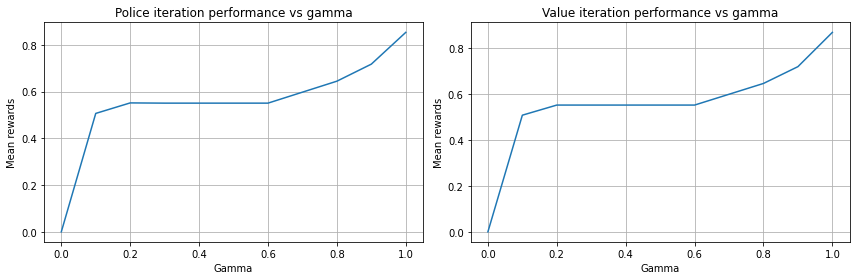

In [22]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1,2, figsize = (12,4))
x_axis = np.arange(0,1.1,0.1)
# x_axis = np.arange(0,1.0,0.1)
axes[0].plot(x_axis, rewards_pi)
axes[0].grid(True)
axes[0].set_xlabel("Gamma")
axes[0].set_ylabel("Mean rewards")
axes[0].set_title('Police iteration performance vs gamma')
axes[1].plot(x_axis, rewards_vi)
axes[1].grid(True)
axes[1].set_xlabel("Gamma")
axes[1].set_ylabel("Mean rewards")
axes[1].set_title('Value iteration performance vs gamma')
fig.tight_layout()

 3. What is the impact of the value function convergence criterion epsilon?
 
    As shown in the result the $\epsilon$ can froces the model learn more accurate value function,
    which will reduce the randomness of the model performance but won't influence model final performance much.
    And it will only affect the policy iteration method.

    However if epsilon equal or larger than the 1.0 the model may not convergence.


In [23]:
rewards_pi = []
import math
eps = [1/10.0**i for i in np.arange(1,10,1)]
for i in range(10):
    curr_config = default_pi_config.copy()
    curr_config['eps'] = eps[i]
    print('current epsilon:{}'.format(eps[i]))
    pi_agent = policy_iteration(curr_config)
    rewards_pi.append(pi_agent.evaluate())


current epsilon:0.1
[INFO]	In 0 iteration, current mean episode reward is 0.0.
[INFO]	In 1 iteration, current mean episode reward is 0.0.
[INFO]	In 2 iteration, current mean episode reward is 0.0.
[INFO]	In 3 iteration, current mean episode reward is 0.0.
[INFO]	In 4 iteration, current mean episode reward is 0.0.
[INFO]	In 5 iteration, current mean episode reward is 0.542.
[INFO]	In 6 iteration, current mean episode reward is 0.868.
[INFO]	In 7 iteration, current mean episode reward is 0.885.
[INFO]	In 8 iteration, current mean episode reward is 0.885.
We found policy is not changed anymore at itertaion 9. Current mean episode reward is 0.885. Stop training.
current epsilon:0.01
[INFO]	In 0 iteration, current mean episode reward is 0.065.
[INFO]	In 1 iteration, current mean episode reward is 0.58.
[INFO]	In 2 iteration, current mean episode reward is 0.806.
[DEBUG]	Updated values for 200 steps. Difference between new and old table is: 0.02277778414538628
[INFO]	In 3 iteration, current 

IndexError: list index out of range

[0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06, 1e-07, 1e-08, 1e-09]


Text(0.5, 1.0, 'Police iteration performance vs epsilon')

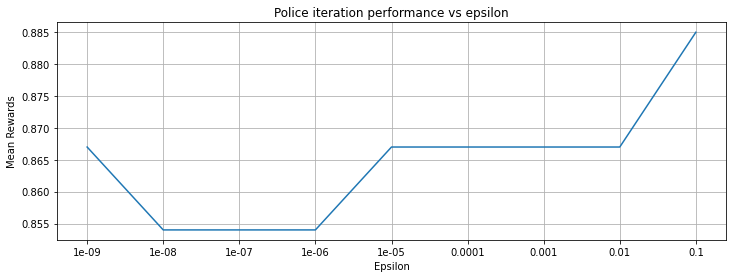

In [24]:

fig, axes = plt.subplots(1,1, figsize = (12,4))
# x_axis = np.arange(0,1.1,0.1)
x_axis = np.array(eps)
x_axis = np.log10(x_axis)
print(eps)
axes.plot(x_axis, rewards_pi)
axes.grid(True)
axes.set_xlabel("Epsilon")
axes.set_xticks(x_axis)
axes.set_xticklabels(eps)
axes.set_ylabel("Mean Rewards")
axes.set_title('Police iteration performance vs epsilon')

# fig.tight_layout()


 ------

 ## Conclusion and Discussion

 In this assignment, we learn how to use Gym package, how to use Object Oriented Programming idea to build a basic tabular RL algorithm.

 It's OK to leave the following cells empty. In the next markdown cell, you can write whatever you like. Like the suggestion on the course, the confusing problems in the assignments, and so on.

 If you want to do more investigation, feel free to open new cells via `Esc + B` after the next cells and write codes in it, so that you can reuse some result in this notebook. Remember to write sufficient comments and documents to let others know what you are doing.

 Following the submission instruction in the assignment to submit your assignment to our staff. Thank you!

 ------

 ...